In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
Survived = pd.read_csv('/content/gender_submission.csv')

In [3]:
test['Survived'] = Survived.iloc[:,1]

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [8]:
train.shape,test.shape

((891, 12), (418, 12))

In [9]:
train.Cabin.fillna('no',inplace = True)
test.Cabin.fillna('no',inplace = True)

In [10]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [11]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
Survived        0
dtype: int64

In [12]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
train.dropna(inplace = True)
test.dropna(inplace = True)

In [14]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        712 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [17]:
train.drop('Name',axis = 1,inplace = True)
test.drop('Name',axis = 1,inplace = True)

<Axes: xlabel='Sex', ylabel='count'>

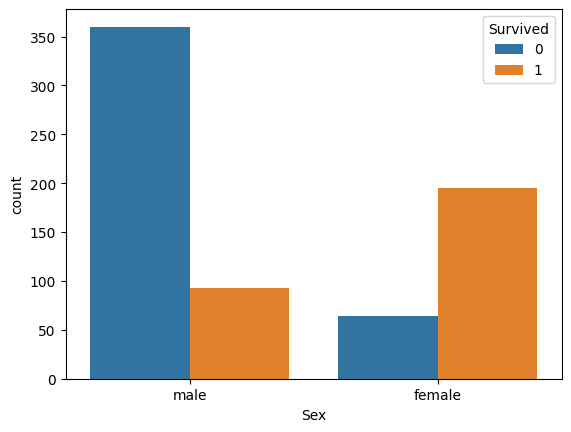

In [18]:
sns.countplot(x = train.Sex,hue = train.Survived)

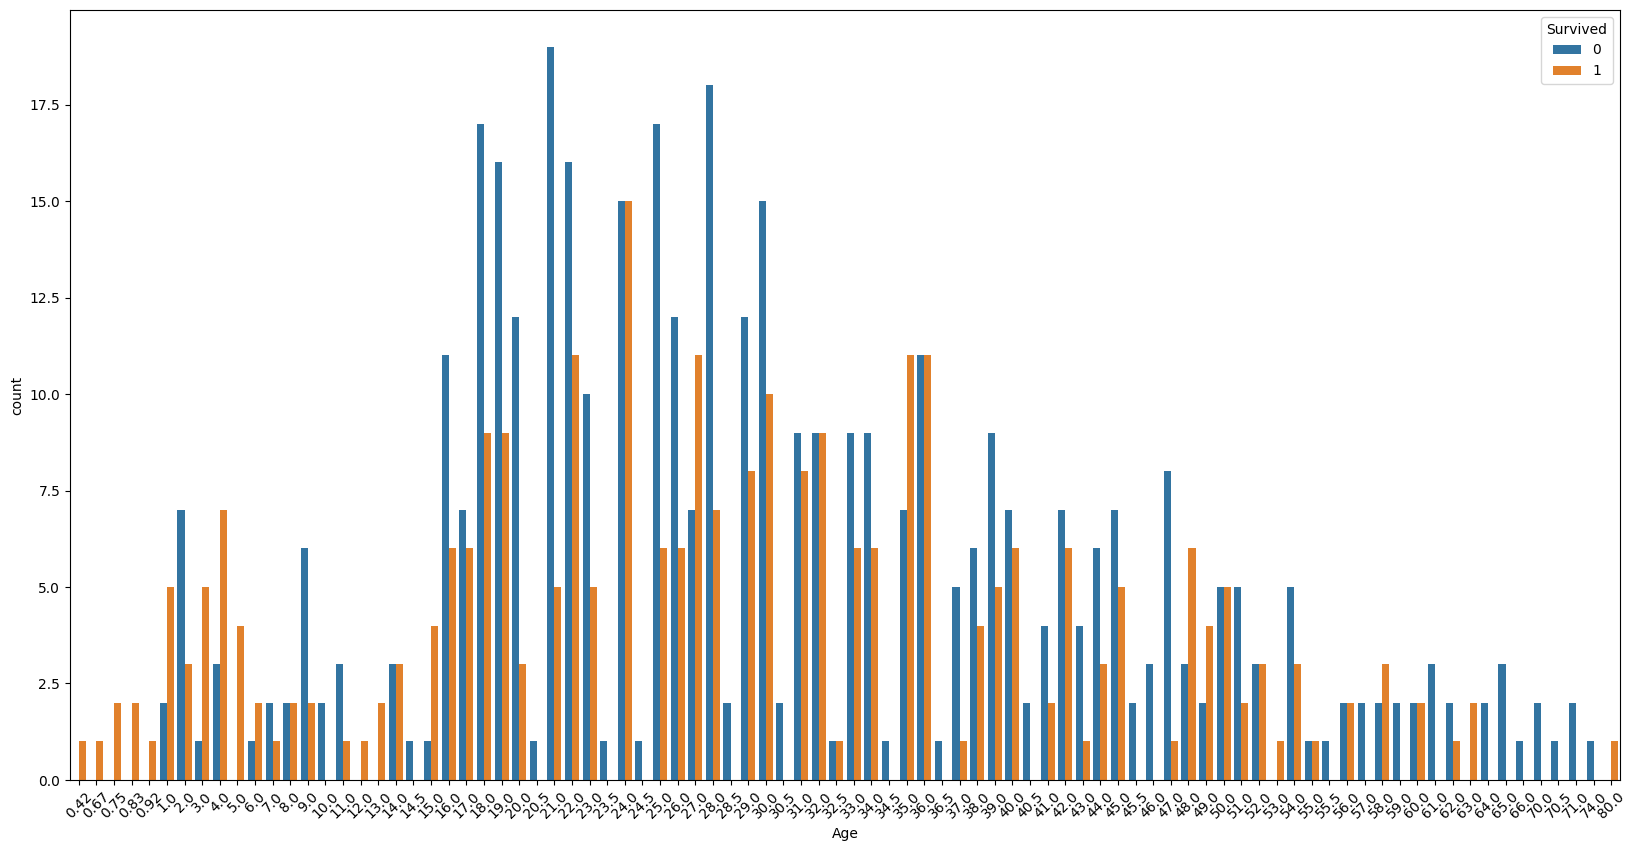

In [19]:
plt.figure(figsize = (20,10))
sns.countplot(x = train.Age,hue = train.Survived)
plt.xticks(rotation = 45)
plt.show()

In [20]:
train.Survived.value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [22]:
le = LabelEncoder()
for i in train.columns:
  if train[i].dtype == 'object':
    train[i] = le.fit_transform(train[i])

le = LabelEncoder()
for i in test.columns:
  if test[i].dtype == 'object':
    test[i] = le.fit_transform(test[i])

<Axes: >

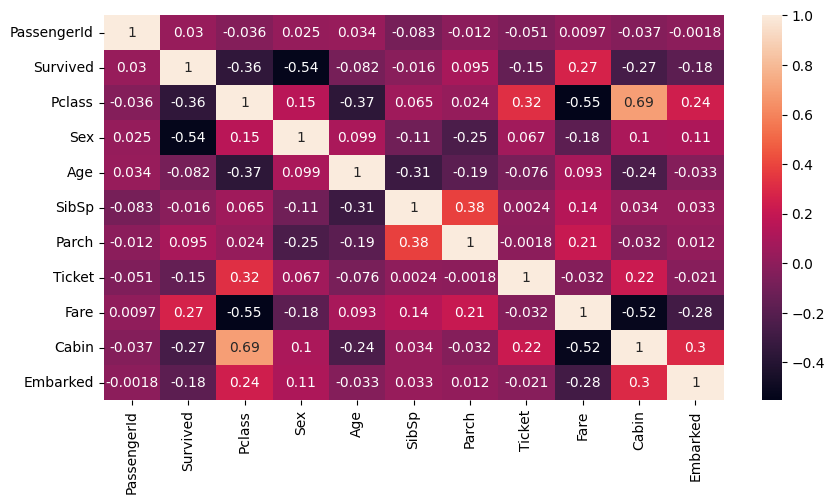

In [23]:
plt.figure(figsize = (10,5))
sns.heatmap(train.corr(),annot = True)

In [24]:
xtrain = train.drop('Survived',axis = 1)
ytrain = train['Survived']
xtest = test.drop('Survived',axis = 1)
ytest = test['Survived']

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier()

In [27]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [28]:
ypred = rf.predict(xtest)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [30]:
accuracy_score(ytest,ypred)

0.8489425981873112

In [31]:
!pip install -q pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 39.0 MB/s

In [33]:
from pycaret.classification import *

In [34]:
se = setup(train,target = 'Survived',session_id = 222)

,Description,Value
0,Session id,222
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(712, 11)"
4,Transformed data shape,"(712, 11)"
5,Transformed train set shape,"(498, 11)"
6,Transformed test set shape,"(214, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [35]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8076,0.8580,0.7214,0.7884,0.7511,0.5950,0.5988,0.1060
rf,Random Forest Classifier,0.7975,0.8620,0.6867,0.7832,0.7292,0.5693,0.5743,0.3100
xgboost,Extreme Gradient Boosting,0.7913,0.8422,0.6917,0.7737,0.7275,0.5595,0.5645,0.0540
et,Extra Trees Classifier,0.7912,0.8612,0.7012,0.7684,0.7286,0.5600,0.5658,0.1290
lightgbm,Light Gradient Boosting Machine,0.7893,0.8480,0.7017,0.7577,0.7273,0.5564,0.5586,0.6430
qda,Quadratic Discriminant Analysis,0.7874,0.8363,0.7262,0.7415,0.7319,0.5560,0.5577,0.0310
ridge,Ridge Classifier,0.7873,0.0000,0.6967,0.7596,0.7236,0.5516,0.5561,0.0230
lda,Linear Discriminant Analysis,0.7853,0.8477,0.6967,0.7546,0.7217,0.5477,0.5517,0.0180
ada,Ada Boost Classifier,0.7835,0.8190,0.7269,0.7358,0.7285,0.5488,0.5520,0.1340
lr,Logistic Regression,0.7813,0.8470,0.6864,0.7537,0.7153,0.5387,0.5434,0.6820


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [36]:
best.fit(xtrain,ytrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=222, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [37]:
ypred_gb = best.predict(xtest)

In [38]:
accuracy_score(ytest,ypred_gb)

0.8398791540785498

In [39]:
param_grid = {
    'n_estimators':[100,200,300],
    'criterion':['gini','entropy'],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
gsc = GridSearchCV(rf,param_grid,cv = 2)

In [42]:
gsc.fit(xtrain,ytrain)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
best_params = gsc.best_params_
best_model = gsc.best_estimator_
best_params,best_model

({'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 200},
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='entropy', max_depth=10, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=2,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=200, n_jobs=None, oob_score=False,
                        random_state=None, verbose=0, warm_start=False))

In [44]:
ypred_hpt = best_model.predict(xtest)

In [45]:
accuracy_score(ytest,ypred_hpt)

0.9003021148036254

In [65]:
from sklearn.tree import export_graphviz
import graphviz

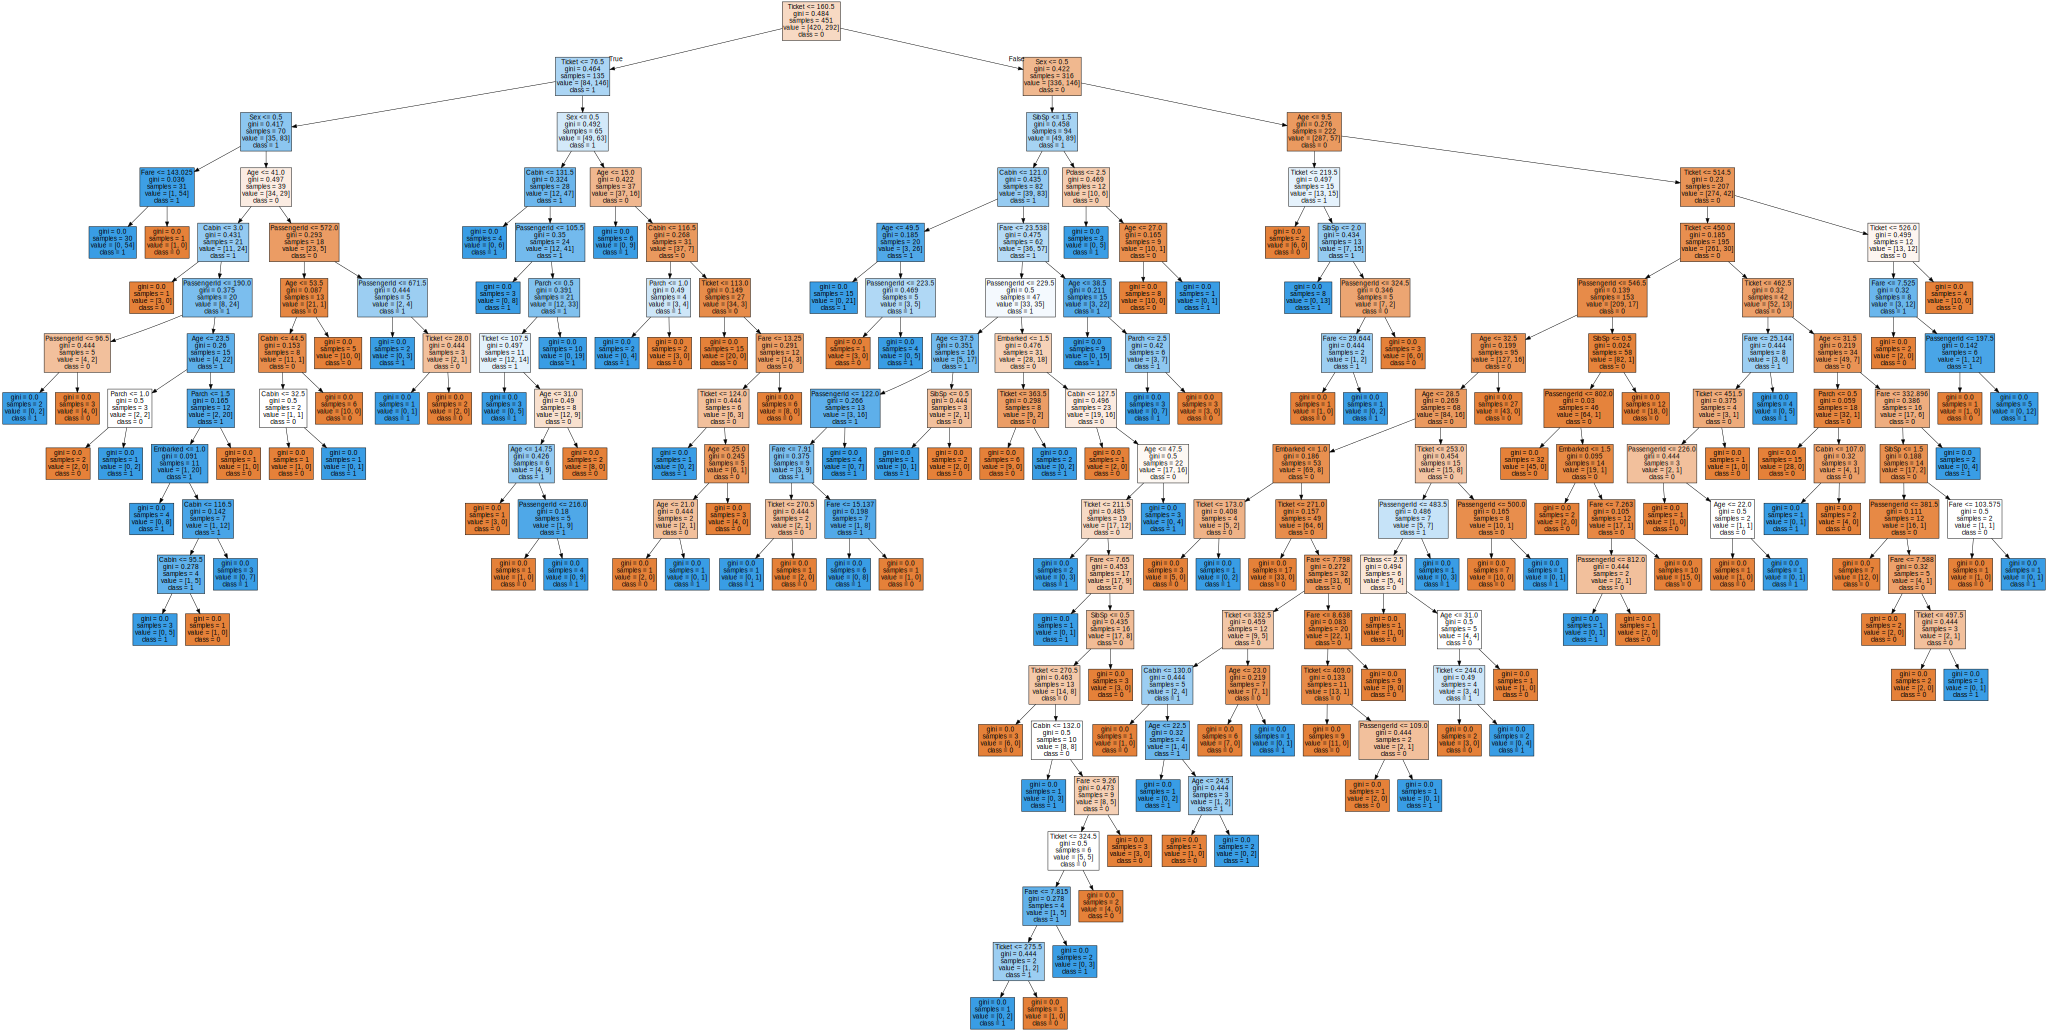

In [70]:
dt_1 = export_graphviz(rf[1],feature_names = xtrain.columns,class_names = ['0','1'],filled = True)
graphviz.Source(dt_1)

In [69]:
rf[1]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=782841157, splitter='best')